<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/admission.png?raw=true" width=800 align="left"/>

# 실습 내용

- Admission 데이터로 모델링합니다.
- Logistic Regression 알고리즘으로 모델링합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [5]:
# 범주값 개수 확인
data['ADMIT'].value_counts()

0    282
1    218
Name: ADMIT, dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [7]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [9]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# 2단계: 선언하기
model = LogisticRegression()

In [11]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [13]:
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))


[[75  9]
 [14 52]]


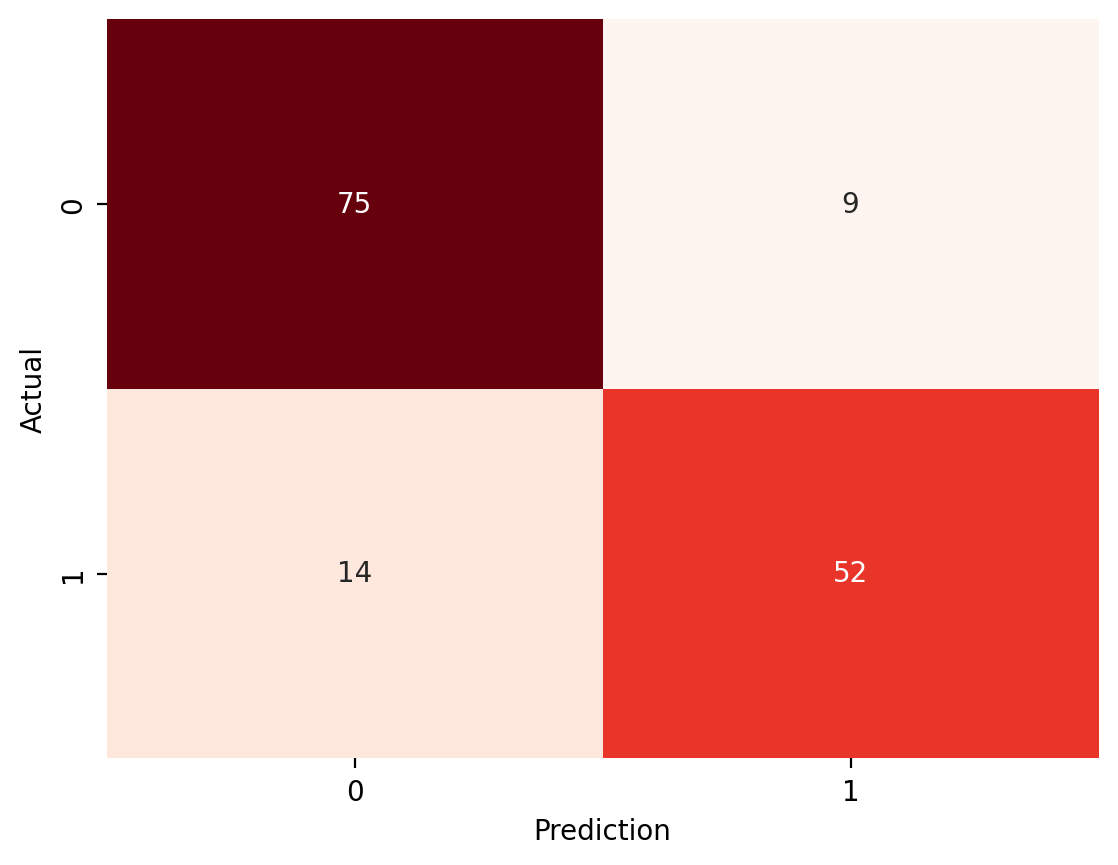

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap='Reds',
            cbar=False,
            fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.85      0.79      0.82        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



In [16]:
y_pred[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
p = model.predict_proba(x_test)

p[:10,1]

array([0.06188073, 0.54581883, 0.90445076, 0.35127807, 0.81589093,
       0.13353099, 0.35314981, 0.07844275, 0.67239859, 0.06719197])

In [23]:
my_pred = [1 if x > 0.5 else 0 for x in p[:,1]]
my_pred[:10]

[0, 1, 1, 0, 1, 0, 0, 0, 1, 0]